In [52]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from IPython.display import display
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline

pd.options.display.max_rows = 4000

In [53]:
# read in training data
train = pd.read_csv('./datasets/train.csv')
# Format variable names
train.columns = train.columns.str.lower().str.replace(" ", "_")


In [54]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [55]:
train.shape

(2051, 81)

In [56]:
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [57]:
# Check for Nulls
null_pct = train.isnull().mean()
print(null_pct.sort_values(ascending = False).head())

pool_qc         0.995612
misc_feature    0.968308
alley           0.931741
fence           0.804973
fireplace_qu    0.487567
dtype: float64


In [58]:
#Fill Non-Numeric Nulls
train['fireplace_qu'].fillna("NA", inplace = True)
train['pool_qc'].fillna("NA", inplace = True)
train['alley'].fillna('NA', inplace = True)


In [59]:
# Remove outliers from House size feature
indexNames = train[train['gr_liv_area'] > 4000].index
train.drop(indexNames, inplace = True)

indexNames = train[train['saleprice'] > 500000].index
train.drop(indexNames, inplace = True)

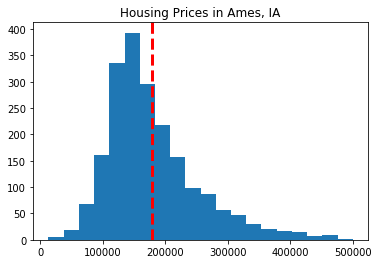

In [60]:
# Distribution of Target Vector
ax = plt.hist((train['saleprice']), bins = 20);
plt.title("Housing Prices in Ames, IA");
plt.axvline(train['saleprice'].mean(), color='red', linestyle='dashed', linewidth=3);




In [61]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["saleprice"], ascending = False, inplace = True)
print(corr.saleprice)


Find most important features relative to target
saleprice          1.000000
overall_qual       0.807756
gr_liv_area        0.711655
garage_cars        0.653324
total_bsmt_sf      0.652443
garage_area        0.652437
1st_flr_sf         0.636204
year_built         0.583305
year_remod/add     0.562313
garage_yr_blt      0.544540
full_bath          0.536606
totrms_abvgrd      0.486419
mas_vnr_area       0.483539
fireplaces         0.478641
bsmtfin_sf_1       0.438124
lot_frontage       0.365966
open_porch_sf      0.345997
wood_deck_sf       0.328962
bsmt_full_bath     0.284762
lot_area           0.277768
half_bath          0.277023
2nd_flr_sf         0.246514
bsmt_unf_sf        0.188590
bedroom_abvgr      0.135278
screen_porch       0.104682
3ssn_porch         0.055337
mo_sold            0.045017
pool_area          0.029465
bsmtfin_sf_2      -0.004741
misc_val          -0.008110
yr_sold           -0.017989
bsmt_half_bath    -0.041430
low_qual_fin_sf   -0.041434
id                -0.045893


In [62]:
# Make testing features

def clean_df(df):
    features = [ 
        # top 10 most correlated features with sale price
         'overall_qual', 'garage_area',
           '1st_flr_sf', 'year_built', 'year_remod/add', '2nd_flr_sf',
            'bsmt_cond' 
    ]
    
    
    X = df[features]
   
    
     # Turning Ordinal Rankings into Numeric
    cast = { 'Ex': 5,
            'TA': 3,
            'Gd': 4,
            'Fa': 2,
            'Po': 1,
            'N' : 0,
            'Y': 1,
            0: 0
            }
    
    for cond in ('bsmt_cond', 
#                  'bsmt_qual', 'exter_qual' ,
#                   'exter_cond', 'garage_cond', 'kitchen_qual',
#                   'heating_qc','fireplace_qu', 'central_air'
                ):
        X[cond] = X[cond].map(cast) 

        
            # Interactions
    X['total_sf'] = X['1st_flr_sf'] +  X['2nd_flr_sf']
    X.drop('1st_flr_sf', inplace = True, axis = 1)
    X.drop('2nd_flr_sf', inplace = True, axis = 1)
    
        
# Add locational Dummies
    dummies = pd.get_dummies(df['neighborhood'])


    X = pd.concat([X,dummies], axis = 1)
    X.fillna(0,inplace = True)


    
    return X


In [64]:
X_train = clean_df(train)
# Ensure train and test datasets are same size
X_train = X_train.drop(['GrnHill', 'Landmrk'], axis = 1)

X_train.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2037, 32)

In [65]:
# Set target Vector
y_train = np.log(train['saleprice'])


In [66]:
# Fit Training Model
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.8587791405909599

In [67]:
cross_val_score(linreg, X_train, y_train, cv = 5).mean()

0.8537391336309718

In [68]:
import statsmodels.api as sm



X = sm.add_constant(X_train)



y = np.exp(y_train)



model = sm.OLS(y,X).fit()


model.summary()



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     336.2
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:03:01   Log-Likelihood:                -23846.
No. Observations:                2037   AIC:                         4.776e+04
Df Residuals:                    2004   BIC:                         4.794e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.23e+06   1.18e+05    -10.450      0.000   -1.46e+06   -9.99e+05
overall_qual    1.673e+04    830.281     20.147      0.000    1.51e+04    1.84e+04
garage_area       51.2359      4.163     12.307      0.000      43.071      59.401
year_built       337.9536     49.738      6.795      0.000     240.409     435.498
year_remod/add   288.9976     44.893      6.437      0.000     200.956     377.039
bsmt_cond       4925.4436   1227.759      4.012      0.000    2517.625    7333.262
total_sf          53.4005      1.897     28.153      0.000      49.681      57.120
Blmngtn        -6.396e+04   1.83e+04     -3.499      0.000   -9.98e+04   -2.81e+04
Blueste        -8.515e+04    2.1e+04     -4.056      0.000   -1.26e+05    -4.4e+04
BrDale         -8.718e+04   1.85e+04     -4.717      0.000   -1.23e+05   -5.09e+04
BrkSide        -4.937e+04   1.77e+04     -2.788      0.005   -8.41e+04   -1.46e+04
ClearCr         -2.59e+04   1.81e+04     -1.429      0.153   -6.14e+04    9655.270
CollgCr         -5.72e+04   1.73e+04     -3.305      0.001   -9.11e+04   -2.33e+04
Crawfor        -2.643e+04   1.76e+04     -1.498      0.134    -6.1e+04    8170.937
Edwards        -5.292e+04   1.74e+04     -3.037      0.002   -8.71e+04   -1.88e+04
Gilbert        -6.581e+04   1.74e+04     -3.788      0.000   -9.99e+04   -3.17e+04
Greens         -6.074e+04   2.43e+04     -2.504      0.012   -1.08e+05   -1.32e+04
IDOTRR         -5.386e+04   1.78e+04     -3.031      0.002   -8.87e+04    -1.9e+04
MeadowV        -6.924e+04   1.83e+04     -3.787      0.000   -1.05e+05   -3.34e+04
Mitchel        -5.347e+04   1.75e+04     -3.056      0.002   -8.78e+04   -1.92e+04
NAmes          -4.906e+04   1.73e+04     -2.832      0.005    -8.3e+04   -1.51e+04
NPkVill        -7.696e+04   1.86e+04     -4.134      0.000   -1.13e+05   -4.05e+04
NWAmes          -5.85e+04   1.75e+04     -3.345      0.001   -9.28e+04   -2.42e+04
NoRidge        -2.383e+04   1.78e+04     -1.340      0.180   -5.87e+04     1.1e+04
NridgHt        -8253.7774   1.74e+04     -0.474      0.636   -4.24e+04    2.59e+04
OldTown        -6.086e+04   1.76e+04     -3.454      0.001   -9.54e+04   -2.63e+04
SWISU           -5.75e+04   1.82e+04     -3.166      0.002   -9.31e+04   -2.19e+04
Sawyer         -4.996e+04   1.75e+04     -2.860      0.004   -8.42e+04   -1.57e+04
SawyerW        -6.544e+04   1.74e+04     -3.752      0.000   -9.96e+04   -3.12e+04
Somerst         -5.51e+04   1.74e+04     -3.173      0.002   -8.92e+04    -2.1e+04
StoneBr        -1.511e+04    1.8e+04     -0.841      0.400   -5.03e+04    2.01e+04
Timber         -3.516e+04   1.77e+04     -1.989      0.047   -6.98e+04    -485.012
Veenker        -2.609e+04   1.86e+04     -1.400      0.162   -6.26e+04    1.05e+04
==============================================================================
Omnibus:        

In [69]:
# Bring in Testing Data
test = pd.read_csv('./datasets/test.csv')
test.columns = test.columns.str.lower().str.replace(" ", "_")
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [70]:
test.shape

(878, 80)

In [71]:
X_test = clean_df(test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [72]:
y_pred = linreg.predict(X_test)

In [73]:

submission = pd.DataFrame(test['id'], columns = ['id'])

submission['SalePrice'] = np.exp(y_pred)

submission.to_csv('./datasets/submission.csv', index=False)


In [74]:
# Further EDA

train.head()

(train[['saleprice', 'neighborhood', 'gr_liv_area']].groupby('neighborhood').mean().sort_values(by = 'saleprice', ascending = False))

,saleprice,gr_liv_area
neighborhood,,
NridgHt,312681.777778,1922.179487
NoRidge,310587.617021,2434.638298
StoneBr,289357.781250,1828.062500
GrnHill,280000.000000,1398.500000
Veenker,253570.588235,1798.058824
Timber,241051.354167,1660.312500
Somerst,227183.900000,1582.776923
ClearCr,217490.074074,1796.185185
Crawfor,205901.211268,1704.464789


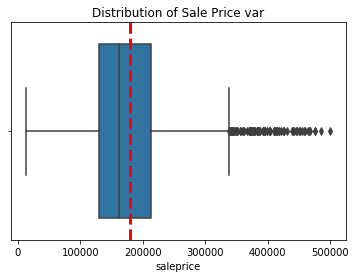

In [75]:
# Distribution of Target Vector
ax = sns.boxplot((train['saleprice']));
plt.title("Distribution of Sale Price var");
plt.axvline(train['saleprice'].mean(), color='red', linestyle='dashed', linewidth=3);

# SKewed towqards lower values, could be outliers in data

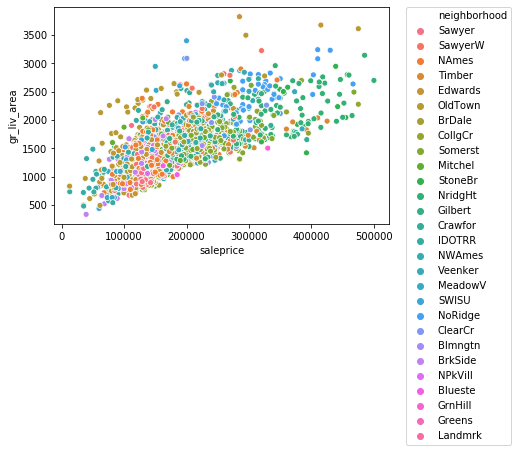

In [76]:
sns.scatterplot(x = train['saleprice'], y = train['gr_liv_area'], hue = train['neighborhood'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [77]:
# Add in slides about Year Built, Year Remodel, Garage Quality, Basement Condition

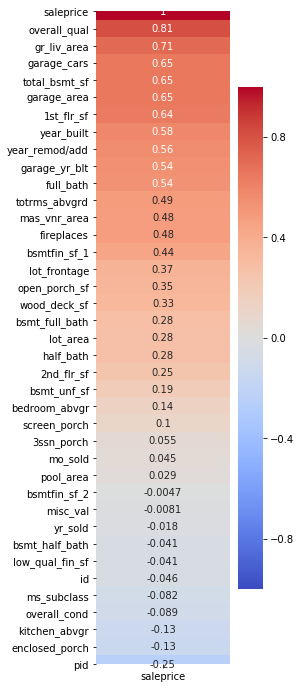

In [78]:
plt.figure(figsize = (3,12))

sns.heatmap(train.corr()[['saleprice']].sort_values(['saleprice'], ascending= False),
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1,
           annot= True)







In [79]:
train['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    117
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     47
StoneBr     32
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [80]:
train[train['neighborhood'] == "StoneBr"].sort_values(by = 'gr_liv_area')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
339,1632,527182040,120,RL,NaN,3696,Pave,NA,Reg,Lvl,...,0,0,NA,NaN,NaN,0,10,2007,WD,170000
1115,1634,527184020,120,RL,38.0,4740,Pave,NA,IR1,Lvl,...,135,0,NA,NaN,NaN,0,10,2007,WD,182000
156,2327,527182020,120,RL,30.0,3701,Pave,NA,IR1,Lvl,...,0,0,NA,NaN,NaN,0,8,2006,WD,130000
1673,8,527145080,120,RL,43.0,5005,Pave,NA,IR1,HLS,...,144,0,NA,NaN,NaN,0,1,2010,WD,191500
1014,1003,527145090,120,RL,39.0,5070,Pave,NA,IR1,HLS,...,144,0,NA,NaN,NaN,0,8,2008,WD,180000
1231,1635,527184110,120,RL,35.0,5118,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,8,2007,WD,212000
429,1002,527140090,120,RL,41.0,5395,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,10,2008,WD,180000
1613,1010,527183060,120,RL,65.0,5950,Pave,NA,IR1,HLS,...,0,0,NA,NaN,NaN,0,4,2008,WD,188500
309,366,527182110,120,RL,NaN,5814,Pave,NA,IR1,Lvl,...,0,0,NA,NaN,NaN,0,8,2009,COD,187500
1136,1641,527252070,20,RL,60.0,8089,Pave,NA,Reg,HLS,...,0,0,NA,NaN,NaN,0,10,2007,New,392000
